# Machine Learning 3

Dataset from Kaggle: **"US Accidents (2016-2021)"** by *Sobhan Moosavi*\
Source: https://www.kaggle.com/sobhanmoosavi/us-accidents \
Description of data available at https://smoosavi.org/datasets/us_accidents.

---

Now we will be using logistic regression as part of our Machine Learning models. Logistic regression models discrete data and return in a form of probability, given an input variable.

## Data Preparation

We first import the essential Python libraries.  In addition to the four libraries (i.e. numpy, pandas, seaborn and matplotlib.pyplot) that we have imported previously, we also import eli5, which is a Python package which helps to debug machine learning classifiers and explain their predictions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

import eli5

As usual, we import the file **us_16_acd_ohe.csv** which contains the ohe-ed data, but not upsampled.

In [2]:
us_16_acd_ohe=pd.read_csv('us_16_acd_ohe.csv')
us_16_acd_ohe.head()

,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,SIDE_L,SIDE_R,STATE_Alabama,STATE_Arizona,STATE_Arkansas,STATE_California,...,CROSSING_False,CROSSING_True,JUNCTION_False,JUNCTION_True,TRAFFIC_SIGNAL_False,TRAFFIC_SIGNAL_True,DAY_NIGHT_Day,DAY_NIGHT_Night,DAY_NIGHT_NotDefined,SEVERITY
0,36.9,91.0,29.68,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
1,36.0,97.0,29.70,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2
2,39.0,55.0,29.65,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
3,37.0,93.0,29.69,10.4,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3
4,35.6,100.0,29.66,8.1,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2


A glance at the info of our data.

In [3]:
us_16_acd_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114829 entries, 0 to 114828
Data columns (total 80 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   TEMPERATURE                      114829 non-null  float64
 1   HUMIDITY                         114829 non-null  float64
 2   PRESSURE                         114829 non-null  float64
 3   WIND_SPEED                       114829 non-null  float64
 4   SIDE_L                           114829 non-null  float64
 5   SIDE_R                           114829 non-null  float64
 6   STATE_Alabama                    114829 non-null  float64
 7   STATE_Arizona                    114829 non-null  float64
 8   STATE_Arkansas                   114829 non-null  float64
 9   STATE_California                 114829 non-null  float64
 10  STATE_Colorado                   114829 non-null  float64
 11  STATE_Connecticut                114829 non-null  float64
 12  ST

We change the data type of ```SEVERITY``` column from ```int64``` to ```category``` as required.

In [4]:
us_16_acd_ohe["SEVERITY"] = us_16_acd_ohe["SEVERITY"].astype("category")

## Logistic Regression

Here we import the necessary functions requried from `sklearn` to perform our train and test split, logistic regression model and some `sklearn.metrics` to visualise our results.
> **train_test_split**: Split arrays or matrices into random train and test subsets.\
> **classification_report**: Build a text report showing the main classification metrics.\
> **accuracy_score**: Accuracy classification score.\
> **f1_score**: Combines the precision and recall of a classifier into a single metric by taking their harmonic mean.\
> **plot_confusion_matrix**: Plot Confusion Matrix.\
> **roc_auc_score**: Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.\
> **balanced_accuracy_score**: Compute the balanced accuracy, which is defined as the average of recall obtained on each class.\
> **mean_squared_error**: A measure of how close a fitted line is to data points.\
> **r2_score**: R^2 (coefficient of determination) regression score function.\
> **LogisticRegression**: A process of modeling the probability of a discrete outcome given an input variable.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

Here we split our data into train and test data, where the ratio of 8:2 is applied respectively.

In [6]:
y=pd.DataFrame(us_16_acd_ohe["SEVERITY"])
X=pd.DataFrame(us_16_acd_ohe.drop("SEVERITY", axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) #split the data into train:test=8:2
cla_feature_names = X_train.columns.tolist()

Here we define the confusion matrix function for our **train data**.

In [7]:
def confusion_matrix_train(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.OrRd, normalize=None, ax=ax)
    ax.set_title("Confusion Matrix (Train Data)", fontsize = 15)
    plt.show()

This is our **logistic regression** function for our **train data**. Here, we fit our data, create predictions for `X_train` and store the results in a classification report which will be useful later. 

In [8]:
log_reg = LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
log_reg.fit(X_train, y_train.SEVERITY.ravel())
log_reg_predictions_train = log_reg.predict(X_train)
log_reg_results_train = classification_report(y_train, log_reg_predictions_train, zero_division=True, output_dict=True)

This is our **confusion matrix and classification report** for our **train data**. The following description may be useful in our classification report.
> **precision** shows the ratio tp / (tp + fp) where tp stands for true positive and fp stands for false positives. Precision shows the propensity of the classifier not to label as positive a sample that is negative.\
\
> **recall** shows the ratio tp / (tp + fn) where tp stands for true positives and fn stands for false negatives. Recall shows the propensity of the classifier to find all positive samples.\
\
> **f1-score** or better known as **f-beta score** is a weighted harmonic mean of the precision and recall, where an f-beta score reaches its best score at 1 and worst score at 0.\
\
> **support** is the number of occurrences of each class in y_true

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


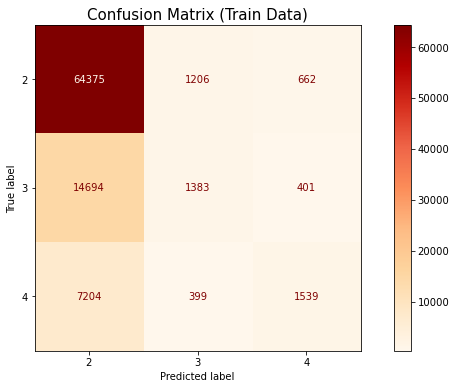

              precision    recall  f1-score   support

           2       0.75      0.97      0.84     66243
           3       0.46      0.08      0.14     16478
           4       0.59      0.17      0.26      9142

    accuracy                           0.73     91863
   macro avg       0.60      0.41      0.42     91863
weighted avg       0.68      0.73      0.66     91863



In [9]:
confusion_matrix_train(log_reg)
print(classification_report(y_train, log_reg_predictions_train, zero_division=True))

This is our **balanced accuracy score** for our **train data**. Balanced accuracy score measures the average of recall obtained on each class where the best score is 1 and the worst score is 0 .

In [10]:
log_balanced_accuracy_train = balanced_accuracy_score(y_train, log_reg_predictions_train)
print(f'balanced_accuracy: {log_balanced_accuracy_train}')

balanced_accuracy: 0.40802492996348433


Here we define the confusion matrix function for our **test data**.

In [11]:
def confusion_matrix_test(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Greens, normalize=None, ax=ax)
    ax.set_title("Confusion Matrix (Test Data)", fontsize = 15)
    plt.show()

This is our **logistic regression** function for our **test data**. Here, we fit our data, create predictions for `X_test` and store the results in a classification report which will be useful later. 

In [12]:
log_reg = LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
log_reg.fit(X_train, y_train.SEVERITY.ravel())
log_reg_predictions_test = log_reg.predict(X_test)
log_reg_results_test = classification_report(y_test, log_reg_predictions_test, zero_division=True, output_dict=True)

This is our **confusion matrix and classification report** for our **test data**. The following description may be useful in our classification report.
> **precision** shows the ratio tp / (tp + fp) where tp stands for true positive and fp stands for false positives. Precision shows the propensity of the classifier not to label as positive a sample that is negative.\
\
> **recall** shows the ratio tp / (tp + fn) where tp stands for true positives and fn stands for false negatives. Recall shows the propensity of the classifier to find all positive samples.\
\
> **f1-score** or better known as **f-beta score** is a weighted harmonic mean of the precision and recall, where an f-beta score reaches its best score at 1 and worst score at 0.\
\
> **support** is the number of occurrences of each class in y_true

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


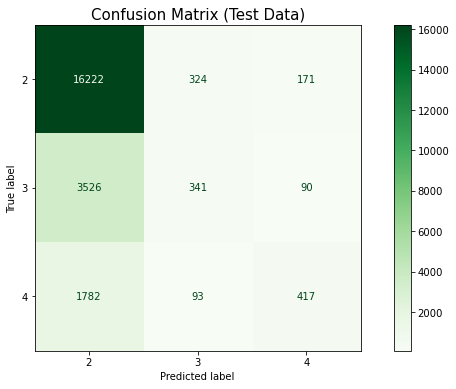

              precision    recall  f1-score   support

           2       0.75      0.97      0.85     16717
           3       0.45      0.09      0.14      3957
           4       0.62      0.18      0.28      2292

    accuracy                           0.74     22966
   macro avg       0.61      0.41      0.42     22966
weighted avg       0.69      0.74      0.67     22966



In [13]:
confusion_matrix_test(log_reg)
print(classification_report(y_test, log_reg_predictions_test, zero_division=True))

This is our **balanced accuracy score** for our **test data**. Balanced accuracy score measures the average of recall obtained on each class where the best score is 1 and the worst score is 0 .

In [14]:
log_balanced_accuracy_test = balanced_accuracy_score(y_test, log_reg_predictions_test)
print(f'balanced_accuracy: {log_balanced_accuracy_test}')

balanced_accuracy: 0.4128343309914546


eli5 is used to show feature importance in a table. Here we will be able to see the top features with respect to the assigned weights.

In [15]:
eli5.show_weights(log_reg, feature_names = cla_feature_names)